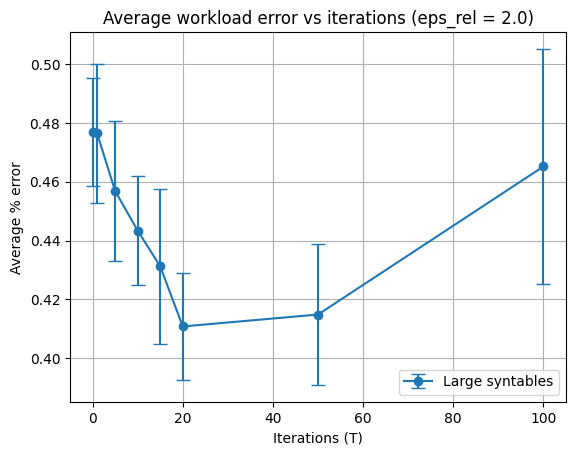

In [1]:
from dp_relational.lib.runner import ModelRunner

import matplotlib.pyplot as plt
import numpy as np

import uuid

def get_errors_by_criteria(runner, criteria, filter_exp=lambda x: True):
    experiments = runner.get_experiments(save_to="./runs")
    
    results = {}
    for experiment in experiments:
        if filter_exp(experiment):
            criteria_val = criteria(experiment)
            if not (criteria_val in results):
                results[criteria_val] = []
            results[criteria_val].append(experiment['error_ave'])

    criteria_vals = []
    ave_errors = []
    error_bars = []

    for criteria_val, res_list in results.items():
        criteria_vals.append(criteria_val)
        res_list_np = np.array(res_list)
        ave_errors.append(np.mean(res_list_np))
        error_bars.append(np.std(res_list_np, ddof=1))

    criteria_vals = np.array(criteria_vals)
    ave_errors = np.array(ave_errors)
    error_bars = np.array(error_bars)

    sorted_idxes = np.argsort(criteria_vals)
    criteria_vals = criteria_vals[sorted_idxes]
    ave_errors = ave_errors[sorted_idxes]
    error_bars = error_bars[sorted_idxes]

    return (criteria_vals, ave_errors, error_bars)

def get_errors_by_T(runner, filter_exp=lambda x: True):
    return get_errors_by_criteria(runner, 
                                  lambda experiment: experiment['parameters']['T'],
                                  filter_exp)

def get_errors_by_eps_rel(runner, filter_exp=lambda x: True):
    return get_errors_by_criteria(runner, 
                                  lambda experiment: experiment['parameters']['epsilon'] - experiment['parameters']['eps1'] - experiment['parameters']['eps2'],
                                  filter_exp)

# below datasets are on ojas's machine
EPSILON_PYTORCH_EXPERIMENT_DATASET = uuid.UUID('037e4226-fd37-11ee-9e28-a059507978f3')
EPSILON_PYTORCH_SPARSE_EXPERIMENT_DATASET = uuid.UUID('8e8d44c1-fe1e-11ee-88ce-a059507978f3')
EPSILON_PYTORCH_SPARSE_LARGE_EXPERIMENT_DATASET = uuid.UUID('53b3b6a5-fe75-11ee-9cb7-a059507978f3')
EPSILON_PYTORCH_SPARSE_VLRGE_EXPERIMENT_DATASET = uuid.UUID('607ae43c-fece-11ee-bd8b-a059507978f3')

# below datasets are on ojas's skunk
T_PYTORCH_SPARSE_LARGE_EXPERIMENT_DATASET = uuid.UUID('0c96cc62-014b-11ef-9020-d21cd07a44f3')

filter_exp_orig = lambda experiment: experiment['artifacts']['rel_dataset'] == EPSILON_PYTORCH_EXPERIMENT_DATASET
filter_exp_ojas = lambda experiment: experiment['artifacts']['rel_dataset'] == EPSILON_PYTORCH_SPARSE_EXPERIMENT_DATASET \
    and experiment['extra_params']['run_set'] == 2
filter_exp_masked_large = lambda experiment: experiment['artifacts']['rel_dataset'] == EPSILON_PYTORCH_SPARSE_LARGE_EXPERIMENT_DATASET \
    and experiment['extra_params']['run_set'] == 11
filter_exp_masked_vlrge = lambda experiment: experiment['artifacts']['rel_dataset'] == EPSILON_PYTORCH_SPARSE_VLRGE_EXPERIMENT_DATASET \
    and experiment['extra_params']['run_set'] == 20

filter_exp_T_large = lambda experiment: experiment['artifacts']['rel_dataset'] == T_PYTORCH_SPARSE_LARGE_EXPERIMENT_DATASET \
    and experiment['extra_params']['run_set'] == 100

runner = ModelRunner(save_to='./runs')

# ============ T Experiments ============
Ts, ave_errors, error_bars = get_errors_by_T(runner, filter_exp_T_large)
plt.figure()
plt.errorbar(Ts, ave_errors, error_bars, fmt='-o', capsize=5, label="Large syntables")
plt.title("Average workload error vs iterations (eps_rel = 2.0)")
plt.xlabel("Iterations (T)")
plt.ylabel("Average % error")
plt.legend()
plt.grid()
plt.show()

# ============ Epsilon Experiments ============

# epsilons, ave_errors, error_bars = get_errors_by_eps_rel(runner, filter_exp_orig)
# epsilons_o, ave_errors_o, error_bars_o = get_errors_by_eps_rel(runner, filter_exp_ojas)
# epsilons_l, ave_errors_l, error_bars_l = get_errors_by_eps_rel(runner, filter_exp_masked_large)
# epsilons_v, ave_errors_v, error_bars_v = get_errors_by_eps_rel(runner, filter_exp_masked_vlrge)

# plt.figure()
# plt.errorbar(epsilons, ave_errors, error_bars, fmt='-o', capsize=5, label="Original generation")
# plt.errorbar(epsilons_o, ave_errors_o, error_bars_o, fmt='-o', capsize=5, label="Ojas masking method")
# plt.errorbar(epsilons_l, ave_errors_l, error_bars_l, fmt='-o', capsize=5, label="Masking large dataset")
# plt.title("Average workload error vs privacy budget")
# plt.xlabel("Relational privacy budget")
# plt.ylabel("Average % error")
# plt.legend()
# plt.grid()
# plt.show()